<a href="https://colab.research.google.com/github/danielfrgs/LCD-PCCD-2021-1/blob/main/ExamenParcial1_Paradigmas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Examen Parcial 1.

Fragoso Alvarado Daniel

Gómez Martinez Jesús Enrique

Rangel Rámirez Hugo

---

1. Obtén las funciones discriminantes del clasificador determinista y también el estadístico para el conjunto de datos Iris; elige al menos dos conjuntos diferentes de columnas para generar funciones diferentes (10p)


---

2. Aplica la regla de aprendizaje para los pesos de una neurona artificial basada en el modelo del perceptron que calcule la función booleana XOR de dos parámetros mostrando la evolución de los pesos (8p)
Nota: El algoritmo sí termina con pesos inicializados a 0, explica a qué se debe

Veamos que la función booleana XOR esta descrita por:

$$
\begin{array}{cc|c}
x_{1} & x_{2} & y \\
\hline 0 & 0 & 0 \\
0 & 1 & 1 \\
1 & 0 & 1 \\
1 & 1 & 0
\end{array}
$$

Recordemos por lo visto en clase que: 

In [ ]:
import numpy as np

class Perceptron(object):
    def __init__(self, eta =0.01, n_iter =50, random_state =1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
        
    def fit(self, X, y ):
        rgen = np.random.RandomState(self.random_state)
        if self.random_state is None :
            self.w_ = np.zeros (1 + len (X [1]))
        else :
            self.w_ = rgen.normal (loc = 0.0, scale = 0.01, size = 1 + X.shape [1])
            self.errors_ = []
        for _ in range (self.n_iter):
            errors = 0
            for xi , yi in zip (X , y ):
                update = self.eta * (yi - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            print(self.w_)
            self.errors_.append(errors)
        return self
                                       
    def net_input(self , X):
        return np.dot (X , self.w_[1:]) + self.w_[0]
                                       
    def predict(self , X ):
        return np.where (self.net_input(X) >= 0.0 , 1, -1)

Aplicamos el modelo a los pesos de una función booleana XOR.

In [ ]:
X =  np.array([[0 ,0], [0 ,1], [1 ,0], [1 ,1]])
y =  np.array([0 ,1 ,1 , 0])

ppn = Perceptron(n_iter =6, eta =0.1)
ppn.fit(X, y)
print('Pesos : %s ' % ppn.w_)

[ 0.01624345 -0.10611756  0.09471828]
[ 0.01624345 -0.00611756 -0.00528172]
[ 0.01624345 -0.10611756  0.09471828]
[ 0.01624345 -0.00611756 -0.00528172]
[ 0.01624345 -0.10611756  0.09471828]
[ 0.01624345 -0.00611756 -0.00528172]
Pesos : [ 0.01624345 -0.00611756 -0.00528172] 


Cuando se inicializan los pesos en $0$, el parámetro $\eta$  afecta unicamente la escala del vector de pesos, pero deja intacta la dirección de este, dando lugar así a que el algortimo concluya pero no realice una eficiente y correcta tasa de aprendizaje sobre los pesos.

----

3. ¿La regresión logística puede separar bien la función booleana XOR de dos parámetros? Argumenta tu respuesta (5p)

No es posible separarlos bien. Si utilizamos un diagrama que muestre las sálidas de la función booleana XOR, teniendo como ejes los parámetros de entrada, encontraremos que las sálidas forman un cuadrado donde, justamente las sálidas verdaderas están en vértices opuestos de la figura, de tal modo que utilizar una recta para separarlas no es viable. Luego, al no poder separarse bien linealmente, no existe garantía de que la regla de aprendizaje converja.

---

4. Escribe un pseudocódigo detallado del algoritmo Sequential Forward Selection (5p)

El *Sequential Forward Selection (SFS)*, al igual que el *SBS*, pertenecen a una familia de algoritmos cuya función principal es reducir la dimensionalidad del conjunto de datos con el propósito de minimizar el error, mejorar la eficiencia computacional y eliminar ruido y datos innecesarios para la resolución de un determinado problema.

El *SFS* recibe el conjunto completo de dimensión $d$ y regresa un subconjunto de dimensión $k < d$, con $k$ el número de características especificado a priori.

El algoritmo inicia creando un conjunto vacío (y por ende $k=0$).
Luego se añade una característica $x$ al conjunto vacío. 
Esta característica es la que maximiza la eficiencia del clasificador o función de criterio cuando se agrega al conjunto.
Se repite esto hasta que se satisfaga el criterio para terminar el proceso.
El criterio para terminar es aquel que se estableció a priori, es decir, el algoritmo sigue añadiendo caractarísticas hasta que $k=p$ para una $p$ determinada.

En general es fácil darse cuenta que este algoritmo hace lo análogo al *SBS*

**Pseudocodigo**

1.- Crear un conjunto vacío $X_{k}=\{\varnothing\}$

2.- Seleccionar la mejor característica $x=\arg \max J(X_{k}+x)$ del conjunto completo

3.- Si $J(X_{k}+x)> J(X_{k})$, actualizamos $X_{k+1}=X_{k}+x$

4.- Hacemos $k=k+1$ y volvemos al paso 2.

----

5. ¿Qué sucede al utilizar Linear Discriminant Analysis (LDA) sobre el conjunto de medias
lunas? Escribe un código que lo muestre (7p)

**Respuesta:**

Recordemos que el objetivo de LDA es encontrar un subespacio de características que optimice la separabilidad de clases. Sin embargo, el algoritmo requiere de una clara definición, o mejor dicho, separación entre los datos para su clasificación, lo que no ocurre con las medias lunas, por lo que esperariamos que no lo logre clasificar, más aún, debido a la falta de caracteristicas para geneerar el subespacio, solo generará una proyección donde parte de los datos estarán encimados.

A continuación se muestra un código, aplicando LDA cargado en Skalearn:

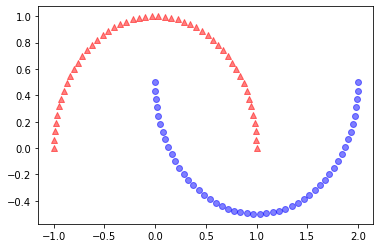

In [ ]:
# Primero vamos a importar las medias lunas de sklearn
from sklearn.datasets import make_moons
import numpy as np
import matplotlib.pyplot as plt

X, y = make_moons(n_samples =100, random_state=123)

# Vamos a gráficarlas para tener una muestra visual:
plt.scatter(X[y==0, 0], X[y==0, 1], color= 'red', marker='^', alpha =0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color= 'blue' , marker='o', alpha=0.5)
plt.show()

In [ ]:
# Vamos a separar en entrenamiento y prueba 
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X, y, test_size =0.3)

In [ ]:
# Estandarizamos
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform (X_test)

In [ ]:
# Importamos el LDA de sklearn
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

# Regresión lineal:
from sklearn.linear_model import LogisticRegression

# inicializar LDA y el modelo de RL
# n_components se hace 1 debido 
lda = LDA()

# Regresión lineal como clasificador:
lr = LogisticRegression()

# Ajustar y transformar los datos
X_train_lda = lda.fit_transform(X_train_std, y_train)
lr.fit(X_train_lda ,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


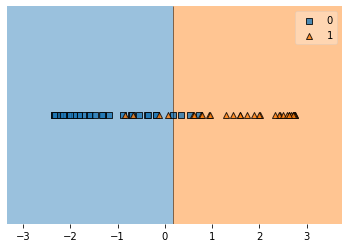

In [ ]:
# Vamos a gráficar:

from mlxtend.plotting import plot_decision_regions

plot_decision_regions(X_train_lda , y_train, clf=lr)
plt.show()

---


6. Escribe un código que utilice KernelPCA con rbf y otra función de kernel para separar
círculos concéntricos; compara los resultados con el uso de PCA sobre los mismos datos (10p)

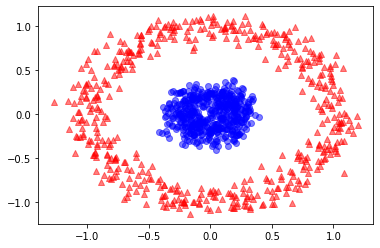

In [ ]:
# Vamos a importar el conjunto de datos de Circulos Concentricos desde skalearn:

from sklearn.datasets import make_circles
X, y = make_circles(n_samples =1000, random_state=123, noise=0.1, factor=0.2)

# Vamos a Gráficar:

plt.scatter(X[y==0, 0], X[y==0, 1], color= 'red', marker='^', alpha =0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color= 'blue' , marker='o', alpha=0.5)
plt.show()

In [27]:
# Vamos a importar Kernel PCA desde Skalearn
from sklearn.decomposition import KernelPCA

# Vamos a inicializar dos clasificadores, cada uno con kernels diferentes, uno con
# 'rbf' - radial basis function
# 'poly' -  Polinomial

kpca1 = KernelPCA(n_components=1, kernel= 'rbf', gamma=15)
kpca2 = KernelPCA(n_components=1, kernel= 'poly', gamma=15)

**RBF**

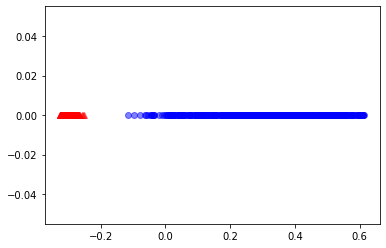

In [29]:
# Vamos a Clasificar:
X_kpca1 = kpca1.fit_transform(X)

# Gráfica
plt.scatter(X_kpca1[y==0, 0], np.zeros((500,1)), color='red',
marker='^', alpha =0.5)
plt.scatter(X_kpca1[y==1, 0], np.zeros((500,1)), color='blue',
marker='o', alpha=0.5)

**POLY**

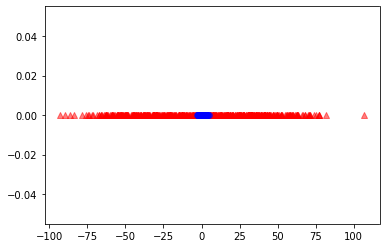

In [30]:
# Vamos a Clasificar:
X_kpca2 = kpca2.fit_transform(X)

# Gráfica
plt.scatter(X_kpca2[y==0, 0], np.zeros((500,1)), color='red',
marker='^', alpha =0.5)
plt.scatter(X_kpca2[y==1, 0], np.zeros((500,1)), color='blue',
marker='o', alpha=0.5)

**PCA** 

Vamos a clasificar por medio de PCA de Skalearn, aunque es de esperarse que no lo logre clasificar y solo proyecte.

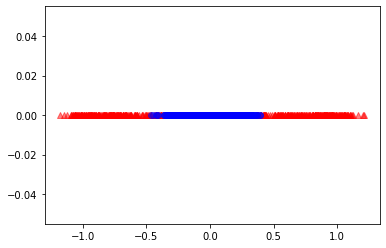

In [31]:
# Importamos PCA
from sklearn.decomposition import PCA

# Iniciamos y Clasificamos
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Gráfica

plt.scatter(X_pca[y==0, 0], np.zeros((500,1)), color='red',
marker='^', alpha =0.5)
plt.scatter(X_pca[y==1, 0], np.zeros((500,1)), color='blue',
marker='o', alpha=0.5)

---

7. Elige dos estimadores y demuestra que definen algoritmos escalables (10p)

  $\underset{p \times 1}{\mathbf{x}}=n^{-1}\left[\sum_{i=1}^{n} x_{i, 1}, \ldots, \sum_{i=1}^{n} x_{i, p}\right]^{T} \quad \hat{\sigma}_{j}^{2}=n^{-1} \sum_{i=1}^{n} x_{i, j}^{2}-\bar{x}_{j}^{2} \quad \hat{\sigma}_{j k}=n^{-1} \sum_{i=1}^{n} x_{i, j} x_{i, k}-\bar{x}_{j} \bar{x}_{k}$

1. Sea un conjunto de datos consistente de $n$ observaciones $D=\left\{\mathbf{x}_{1}, \ldots, \mathbf{x}_{n}\right\}$, donde cada una es un vector de $p$ variables $\underset{p \times 1}{\mathbf{x}_{i}}=\left[x_{i, 1}, \ldots, x_{i, p}\right]^{T}$

  Dividamos el conjunto $D$ en $\boldsymbol{D}_{1}=\left\{\mathbf{x}_{1}, \ldots, \mathbf{x}_{m}\right\}$ у $D_{2}=\left\{\mathbf{x}_{m+1}, \ldots, \mathbf{x}_{n}\right\}$
    
Entonces podemos pensar al estimador como:
    
$$
\underset{2 \times \mathbf{1}}{s(D)}= \left[\begin{array}{c}
\left[\sum_{i=1}^{m} x_{i, 1}, \ldots, \sum_{i=1}^{m} x_{i, p}\right]^{T} \\
n
\end{array}\right]
$$
    
Calculemos cada una de forma que:

$$\underset{p \times 1}{\mathbf{x_1}}=\left[\sum_{i=1}^{m} x_{i, 1}, \ldots, \sum_{i=1}^{m} x_{i, p}\right]^{T}$$

$$\underset{p \times 1}{\mathbf{x_2}}=\left[\sum_{i=(m+1)}^{n} x_{i, 1}, \ldots, \sum_{i=(m+1)}^{n} x_{i, p}\right]^{T}$$

Sumemos ambbos resultados, recordmos que los vectores se suman componente por componente:

$$
\begin{align}
\underset{p \times 1}{\mathbf{x_1}} + \underset{p \times 1}{\mathbf{x_2}} = &  \left[\sum_{i=1}^{m} x_{i, 1}, \ldots, \sum_{i=1}^{m} x_{i, p}\right]^{T} + \left[\sum_{i=(m+1)}^{n} x_{i, 1}, \ldots, \sum_{i=(m+1)}^{n} x_{i, p}\right]^{T} \\
     = &  \left[\sum_{i=1}^{m} x_{i, 1} + \sum_{i=(m+1)}^{n} x_{i, 1}, \ldots, \sum_{i=1}^{m} x_{i, p} + \sum_{i=(m+1)}^{n} x_{i, p}\right]^{T} \\
     = & \left[\sum_{i=1}^{n} x_{i, 1}, \ldots, \sum_{i=1}^{n} x_{i, p}\right]^{T}
     \end{align}
$$
    
Entonces:
    
$$
\underset{2 \times \mathbf{1}}{s(D_1)} + \underset{2 \times \mathbf{1}}{s(D_2)} = \left[\begin{array}{c}
\underset{p \times 1}{\mathbf{x_1}} + \underset{p \times 1}{\mathbf{x_2}} \\
 m + (n-m)
\end{array}\right] = 
\left[\begin{array}{c}
\left[\sum_{i=1}^{m} x_{i, 1}, \ldots, \sum_{i=1}^{m} x_{i, p}\right]^{T} \\
n
\end{array}\right] = \underset{2 \times \mathbf{1}}{s(D)}
$$

Por lo que se trata de Algoritmos escalables (aunque habría que demostrar que se cumple para k+1).

----

8. Obtén las expresiones para determinar los intervalos de contenedores para histogramas bidi- mensionales en función del número de contenedores (5p)

----

9. Un resorte se somete a estiramiento aplicando distintos pesos $(\mathbf{X})$ y se anotó su alargamiento (y); utilizando la solución de la ecuación normal, determina los estimadores $\hat{\boldsymbol{\beta}}, \sigma_{\epsilon}^{2}, \operatorname{var}(\hat{\boldsymbol{\beta}})$
  $$
  \begin{aligned}
  &\mathbf{X}=[0.5,1.07,1.64,2.21,2.79,3.36,3.93,4.5] \\
  &\mathbf{y}=[0.19,0.25,0.51,0.57,0.83,0.99,1.06,1.31]
  \end{aligned}
  $$
  Debes mostrar la forma de calcular $\mathbf{X}^{T} \mathbf{X}$ y su inversa $(10 p)$

----

10. Con los datos del problema anterior, escribe un código para comparar el resultado obtenido con la regresión lineal estándar y el uso de las regularizaciones Lasso y ElasticNet tomando dos muestras para entrenamiento (5p)